In [ ]:
Passo 1: Importar as bibliotecas necessárias

In [1]:
import pandas as pd

In [ ]:
Passo 2: Carregar os dados do arquivo CSV para um DataFrame do Pandas

In [2]:
import chardet

# Substitua 'caminho/para/seu/arquivo.csv' pelo caminho real do seu arquivo CSV
with open('dados_dos_radares.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


ISO-8859-1


In [3]:
import pandas as pd

# Substitua 'caminho/para/seu/arquivo.csv' pelo caminho real do seu arquivo CSV
df = pd.read_csv('dados_dos_radares.csv', encoding='ISO-8859-1')





Passo 3: Visualizar os primeiros registros do DataFrame para entender a estrutura dos dados

In [4]:
print(df.head())


                                                                                                             concessionaria;ano_do_pnv_snv;tipo_de_radar;rodovia;uf;km_m;municipio;tipo_pista;sentido;situacao;data_da_inativacao;latitude;longitude;velocidade_leve;velocidade_pesado
AUTOPISTA FERNÃO DIAS;2007;Controlador;BR-381;S... 200;São Paulo;Principal;Crescente;Ativo;;-23   401335;-46                                       575964;80;60                                                                                                                       
AUTOPISTA FERNÃO DIAS;2007;Controlador;BR-381;S... 400;São Paulo;Principal;Decrescente;Ativo;;-23 387687;-46                                       569328;80;60                                                                                                                       
AUTOPISTA FERNÃO DIAS;2007;Controlador;BR-381;S... 650;São Paulo;Principal;Crescente;Ativo;;-23   384708;-46                                       564716;80;60    

Passo 4: Analisar os tipos de dados e verificar se há valores nulos

In [5]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 640 entries, ('AUTOPISTA FERNÃO DIAS;2007;Controlador;BR-381;SP;78', '200;São Paulo;Principal;Crescente;Ativo;;-23', '401335;-46') to ('VIA SUL;2019;Controlador;BR-386;RS;245', '200;Soledade;Principal;Decrescente;Ativo;;-28', '803798;-52')
Data columns (total 1 columns):
 #   Column                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                     --------------  ----- 
 0   concessionaria;ano_do_pnv_snv;tipo_de_radar;rodovia;uf;km_m;municipio;tipo_pista;sentido;situacao;data_da_inativacao;latitude;longitude;velocidade_leve;velocidade_pesado  640 non-null    object
dtypes: object(1)
memory usage: 71.0+ KB
None
concessionaria;ano_do_pnv_snv;tipo_

In [ ]:
Passo 5: Realizar análises estatísticas descritivas dos dados numéricos

In [6]:
print(df.describe())


       concessionaria;ano_do_pnv_snv;tipo_de_radar;rodovia;uf;km_m;municipio;tipo_pista;sentido;situacao;data_da_inativacao;latitude;longitude;velocidade_leve;velocidade_pesado
count                                                 640                                                                                                                       
unique                                                611                                                                                                                       
top                                          471467;80;80                                                                                                                       
freq                                                    4                                                                                                                       


In [7]:
print(df.columns)


Index(['concessionaria;ano_do_pnv_snv;tipo_de_radar;rodovia;uf;km_m;municipio;tipo_pista;sentido;situacao;data_da_inativacao;latitude;longitude;velocidade_leve;velocidade_pesado'], dtype='object')


In [10]:
# Tentativa 1: Experimentar diferentes encodings
encodings = ['utf-8', 'latin-1', 'iso-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv('dados_dos_radares.csv', sep=';', encoding=encoding)
        print(f"Leitura bem-sucedida com encoding {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Erro ao tentar ler com encoding {encoding}")


Erro ao tentar ler com encoding utf-8
Leitura bem-sucedida com encoding latin-1


Passo 6: Realizar análises específicas dos dados, por exemplo, contagem de radares por tipo de rodovia

In [11]:
contagem_radares_por_rodovia = df.groupby('rodovia')['tipo_de_radar'].count()
print(contagem_radares_por_rodovia)


rodovia
BR-101    137
BR-116     38
BR-153    109
BR-163     86
BR-262     22
BR-290      8
BR-324     23
BR-364     26
BR-365     22
BR-376     14
BR-381     19
BR-386     10
BR-393     12
BR-40      36
BR-414     15
BR-448      2
BR-50      16
BR-60      36
BR-70       5
BR-80       4
Name: tipo_de_radar, dtype: int64


In [ ]:
Passo 7: Visualizar os resultados das análises com gráficos

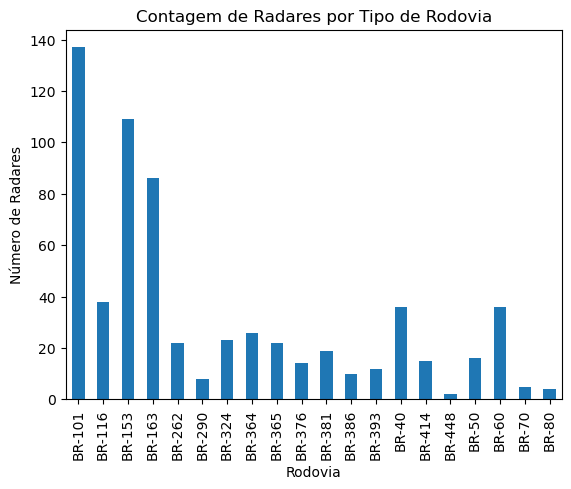

In [13]:
import matplotlib.pyplot as plt

# Gráfico de barras para contagem de radares por tipo de rodovia
contagem_radares_por_rodovia.plot(kind='bar')
plt.title('Contagem de Radares por Tipo de Rodovia')
plt.xlabel('Rodovia')
plt.ylabel('Número de Radares')
plt.show()


Analisar velocidades médias por tipo de radar:

In [15]:
# Calcular as médias das velocidades por tipo de radar
media_velocidade_por_radar = df.groupby('tipo_de_radar')[['velocidade_leve', 'velocidade_pesado']].mean()
print(media_velocidade_por_radar)


               velocidade_leve  velocidade_pesado
tipo_de_radar                                    
Controlador          78.200837          72.384937
Redutor              51.296296          51.296296


Visualizar distribuição de radares por tipo de radar:

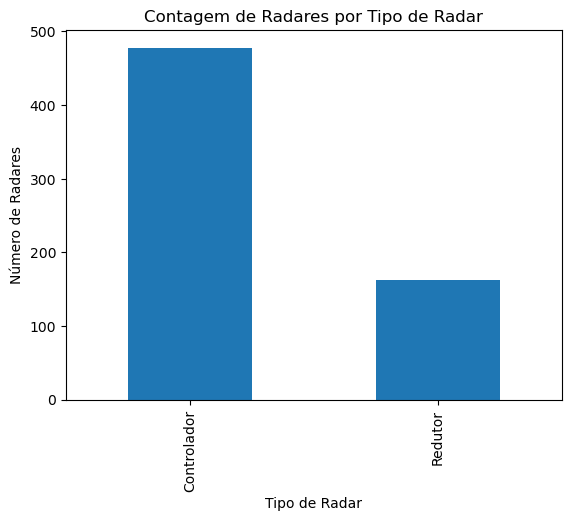

In [16]:
contagem_tipo_radar = df['tipo_de_radar'].value_counts()
contagem_tipo_radar.plot(kind='bar')
plt.title('Contagem de Radares por Tipo de Radar')
plt.xlabel('Tipo de Radar')
plt.ylabel('Número de Radares')
plt.show()


Analisar a situação dos radares:

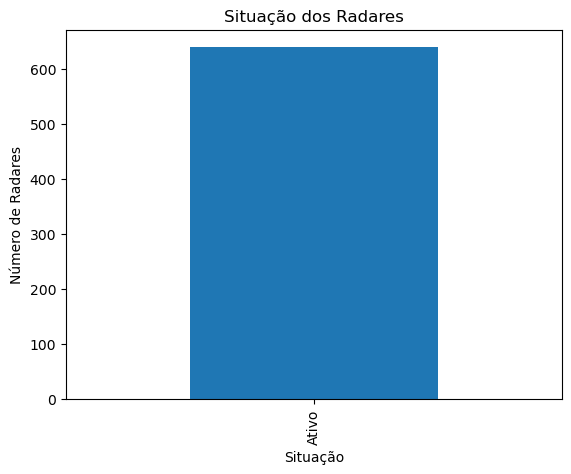

In [23]:
contagem_situacao = df['situacao'].value_counts()
contagem_situacao.plot(kind='bar')
plt.title('Situação dos Radares')
plt.xlabel('Situação')
plt.ylabel('Número de Radares')
plt.show()
